# Open Exploration

In [1]:
# standard packages
import numpy as np
import scipy as sp
import pandas as pd
import time, copy
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  


# EMA imports
from ema_workbench.connectors.vensim import VensimModel
from ema_workbench import (SequentialEvaluator,  IntegerParameter, save_results, load_results, Model)
from ema_workbench.em_framework.evaluators import perform_experiments

from ema_workbench.analysis import (pairs_plotting, plotting, plotting_util, feature_scoring, parcoords)
from ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)


# problem-specific imports
from disease_model_problems import get_model_for_problem_formulation 

C:\Users\shann\Anaconda3\envs\thesis\lib\site-packages\ema_workbench\em_framework\evaluators.py:22: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  'ipyparallel not installed - IpyparalleEvaluator not available')
C:\Users\shann\Anaconda3\envs\thesis\lib\site-packages\ema_workbench\connectors\__init__.py:27: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
C:\Users\shann\Anaconda3\envs\thesis\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)
C:\Users\shann\Anaconda3\envs\thesis\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\shann\Anaconda3\envs\thesis\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling ba

In [2]:
disease_model = get_model_for_problem_formulation(1)
# First, retrieve the model. Here, I have more than one way of formulating the model, but we will just use problem formulation 1 in this example.
n_policies = 6
n_scenarios = 20
# Specify the number of different policies to generate and the number of scenarios to test them under
start = time.time()
with SequentialEvaluator(disease_model) as evaluator:
    results = evaluator.perform_experiments(policies=n_policies, scenarios=n_scenarios)
    file_name = './results/open_exploration/PF1_scenarios'.format(n_scenarios) + '.tar.gz'
    save_results(results, file_name)
# Save the file with a descriptive name (here, in the "open_exploration" folder with a name that includes the number of scenarios "n_scenarios")
end = time.time()
print('Simulation time for Problem Formulation 1 is '+ str(round((end - start)/60)) + ' minutes')
# Print the amount of time it took to run the perform the experiments. For faster per

[MainProcess/INFO] performing 20 scenarios * 6 policies * 1 model(s) = 120 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 12 cases completed
[MainProcess/INFO] 24 cases completed
[MainProcess/INFO] 36 cases completed
[MainProcess/INFO] 48 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 72 cases completed
[MainProcess/INFO] 84 cases completed
[MainProcess/INFO] 96 cases completed
[MainProcess/INFO] 108 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] results saved successfully to C:\Users\shann\Documents\multi_disease_model\results\open_exploration\PF1_scenarios.tar.gz


Simulation time for Problem Formulation 1 is 3 minutes


[MainProcess/INFO] results loaded succesfully from C:\Users\shann\Documents\multi_disease_model\results\open_exploration\PF1_scenarios.tar.gz
C:\Users\shann\Anaconda3\envs\thesis\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\shann\Anaconda3\envs\thesis\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


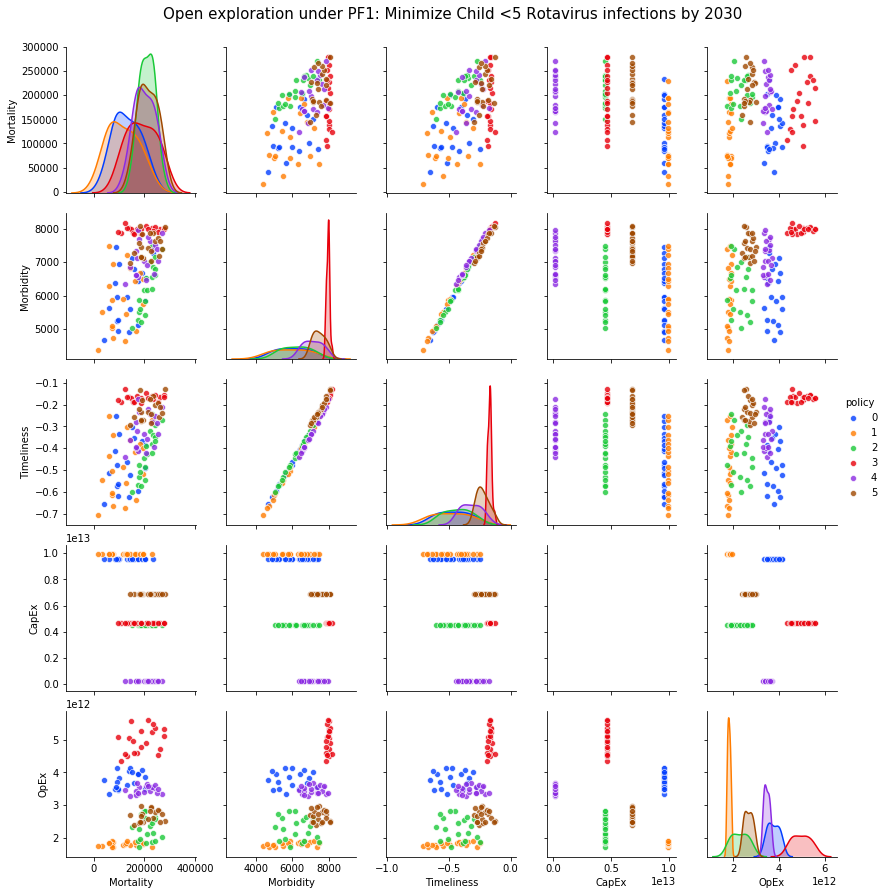

In [5]:
file_name = './results/open_exploration/PF1_scenarios'.format(n_scenarios) + '.tar.gz'
# First, retrieve the results from the previous step
results = load_results(file_name)
disease_model = get_model_for_problem_formulation(1)    
experiments, outcomes = results

# Make pairplots
df_outcomes = pd.DataFrame.from_dict(outcomes)
df_outcomes = df_outcomes.assign(policy=experiments['policy'])
grid = sns.pairplot(df_outcomes, hue='policy', vars=outcomes.keys(),
                        palette=sns.color_palette("bright", 8),plot_kws={'alpha': 0.8})
ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.suptitle('Open exploration under PF1: {}'.format(disease_model.name) , size = 15, y=1.03)
plt.show()

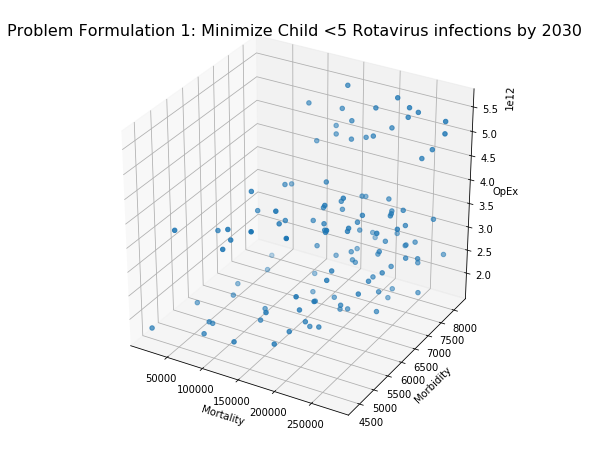

In [8]:
## 3D PLOTS
df_outcomes = pd.DataFrame(outcomes)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_outcomes.iloc[:,0], df_outcomes.iloc[:,1],df_outcomes.iloc[:,4], depthshade=100)
ax.set_xlabel(list(df_outcomes)[0])
ax.set_ylabel(list(df_outcomes)[1])
ax.set_zlabel(list(df_outcomes)[4])
plt.title('Problem Formulation 1: {}'.format(disease_model.name), fontsize=16)
plt.show()

C:\Users\shann\Anaconda3\envs\thesis\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


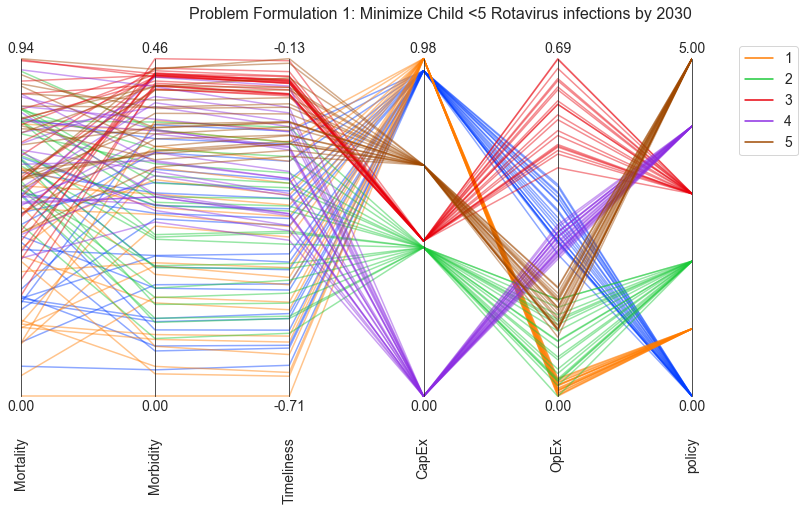

In [36]:
# TRADEOFF PLOTS
limits = parcoords.get_limits(df_outcomes)
# Get the maximum and minimum value of each objective result
lower_lim = limits.loc[0, list(df_outcomes)]
# Set the lower limit of all objectives to zero
upper_lim = limits.loc[1, list(df_outcomes)]
# Set the upper limit of all objectives to one

lower_lim_for_sub = lower_lim
lower_lim_for_sub[2] = 0
upper_lim_for_sub = upper_lim
upper_lim_for_sub[2] = 1
normalized_limits = df_outcomes - lower_lim_for_sub
normalized_limits = normalized_limits/upper_lim_for_sub
# Normalize the limits to make tradeoff plots easier to read (same scale)

df_normalized_limits = normalized_limits.assign(policy=experiments['policy'])
df_normalized_limits['policy'] = df_normalized_limits['policy'].map({p:i for i, p in enumerate(set(experiments['policy']))})  
newlimits = parcoords.get_limits(df_normalized_limits)

# Create parallel axis plot
paraxes = parcoords.ParallelAxes(newlimits, fontsize=14,rot=90)
for i,p in enumerate(set(experiments['policy'])):
    paraxes.plot(df_normalized_limits[df_normalized_limits['policy']==i],
                 label=p, 
                 color=sns.color_palette("bright", 8)[i],
                 alpha= 0.45)
fig = plt.gcf()
fig.set_size_inches(10,7)
paraxes.legend()
plt.title('Problem Formulation 1: {}'.format(disease_model.name), fontsize=16, y=1.08, loc='right')
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


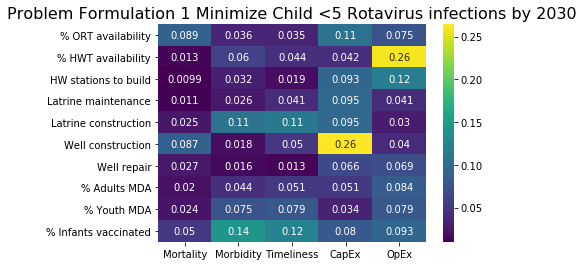

In [9]:
    ## FEATURE SCORES
x = experiments
y = outcomes
fs = feature_scoring.get_feature_scores_all(x, y)
levers = [l.name for l in disease_model.levers]
df_levers = fs.copy()         
df_levers = df_levers[df_levers.index.isin(levers)]
df_levers.rename(index={'Availability HWT':'% HWT availability',
                        'Access to tmt':'% ORT availability',
                        'percent adults given MDA':'% Adults MDA',
                        'percent youth given Albendazole':'% Youth MDA',
                        'percentage of infants to vaccinate':'% Infants vaccinated',
                        'HW stations to build':'HW stations to build',
                        'Number of new latrines to build':'Latrine construction',
                        'Number of latrines to maintain':'Latrine maintenance',
                        'Number of new wells to drill':'Well construction',
                        'Number of wells to repair':'Well repair',}, 
                 inplace=True)
    #print("Number of levers: "+ str(len(df_levers)))  
ax = sns.heatmap(df_levers, cmap='viridis', annot=True)
plt.title('Problem Formulation 1 {}'.format(disease_model.name), fontsize=16)
plt.show()